> **Task 4**
> 
**Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands**

In [1]:
#Importing Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
#Loading the Dataset
df = pd.read_csv("twitter_training.csv", header=None, names=['ID', 'Game', 'Sentiment', 'Text'])

In [3]:
df.head()

,ID,Game,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.tail()

,ID,Game,Sentiment,Text
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
df.shape

(74682, 4)

In [6]:
df.columns

Index(['ID', 'Game', 'Sentiment', 'Text'], dtype='object')

In [38]:
df.info

<bound method DataFrame.info of          ID         Game Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                    Text  msg_len  
0      im getting on borderlands and i will murder yo...       53  
1      I am coming to the borders and I will kill you...       51  
2      im getting on borderlands and i will kill you ...       50  
3      im coming on borderlands and i will murder you...       51  
4      im getting on borderlands 2 and i will murder ...       57  
...                                                  ...      ...  
74677  Just realized that the Windo

# Data Preprocessing

In [7]:
df.isnull().sum()

ID             0
Game           0
Sentiment      0
Text         686
dtype: int64

In [8]:
df.duplicated().sum()

2700

In [9]:
# Remove missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

ID           0
Game         0
Sentiment    0
Text         0
dtype: int64

In [11]:
df.duplicated().sum()

0

# Data Visualization

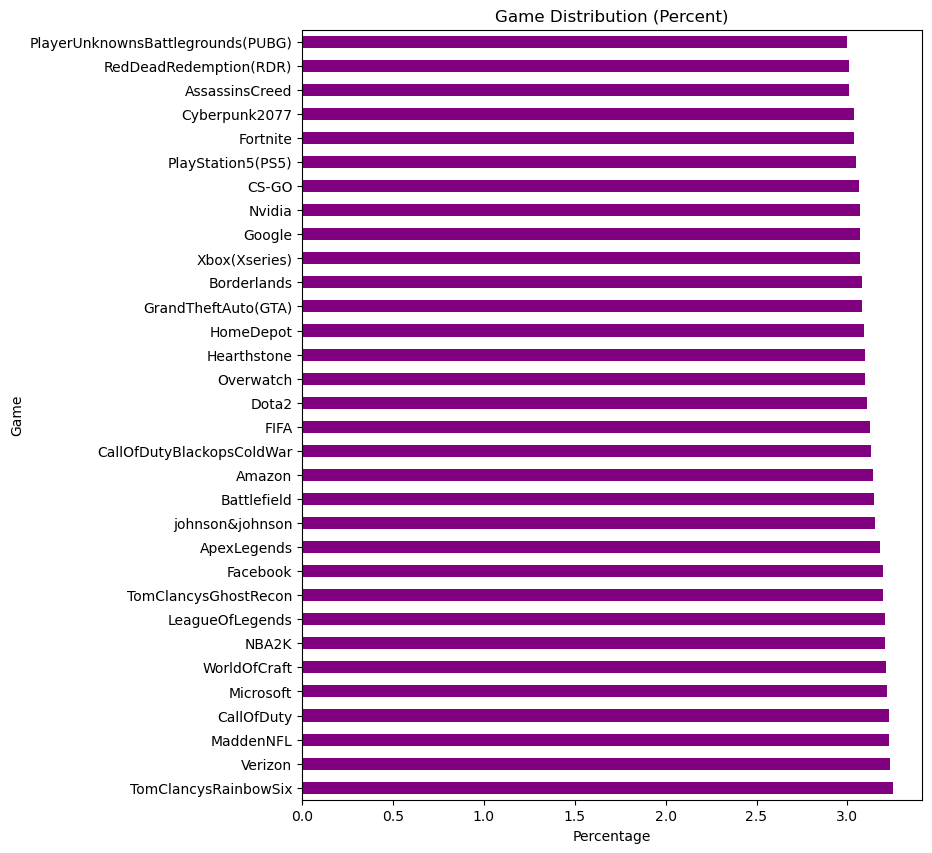

In [42]:
# Calculate the counts for each game
game_counts = df['Game'].value_counts()

# Calculate the percentage for each game
game_percent = (game_counts / len(df)) * 100

# Create the horizontal bar plot
plt.figure(figsize=(8, 10))
game_percent.plot(kind='barh', color='purple')

plt.title('Game Distribution (Percent)')
plt.xlabel('Percentage')
plt.ylabel('Game')
plt.show()

# Sentiment Analysis

In [43]:
df['Sentiment'].count

<bound method Series.count of 0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
74677    Positive
74678    Positive
74679    Positive
74680    Positive
74681    Positive
Name: Sentiment, Length: 71656, dtype: object>

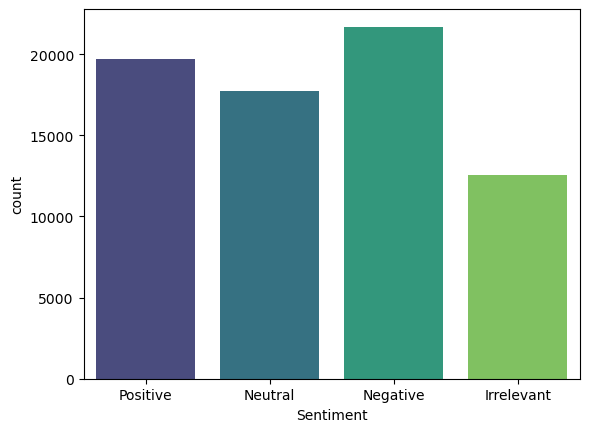

In [44]:
# Visualize sentiment distribution
sns.countplot(x = 'Sentiment',data=df,palette='viridis')
plt.show()

In [45]:
# Calculate the counts for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Print the counts
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64


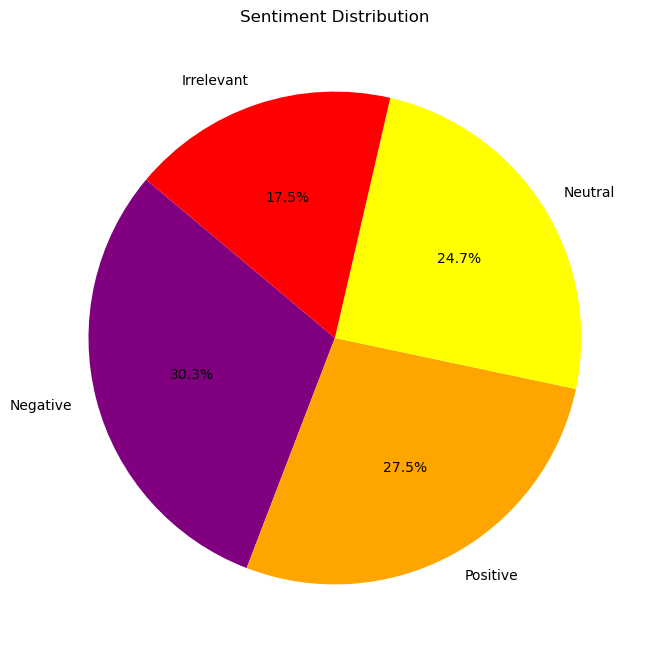

In [46]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['purple', 'orange','yellow', 'red'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

# Sentiment Distribution in Google

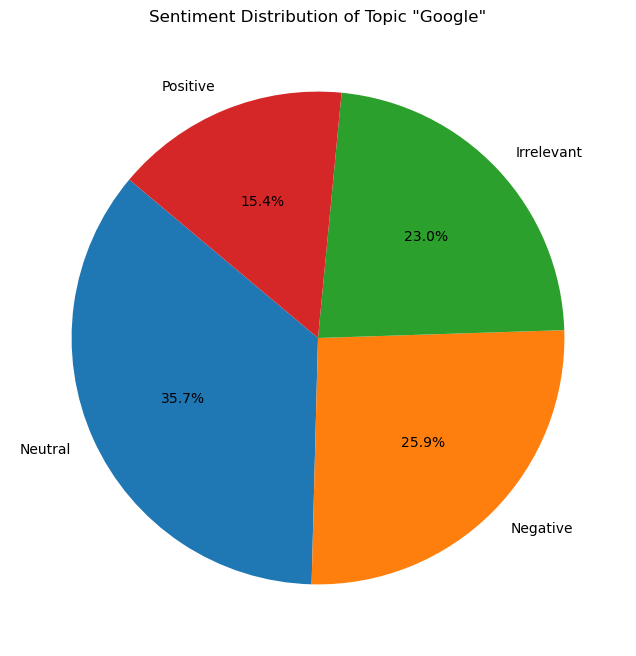

In [47]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = df[df['Game'] == 'Google']


# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

# Sentiment Distribution in Microsoft

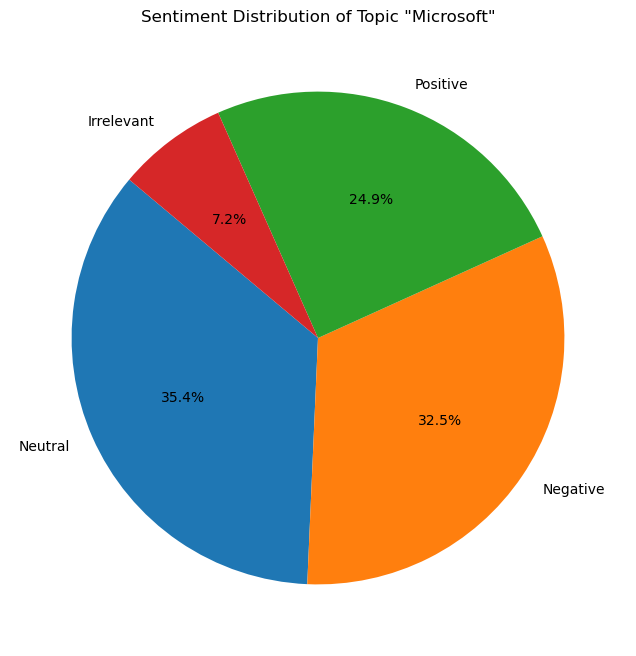

In [48]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
microsoft_data = df[df['Game'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = microsoft_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

# Sentiment Distribution in FIFA

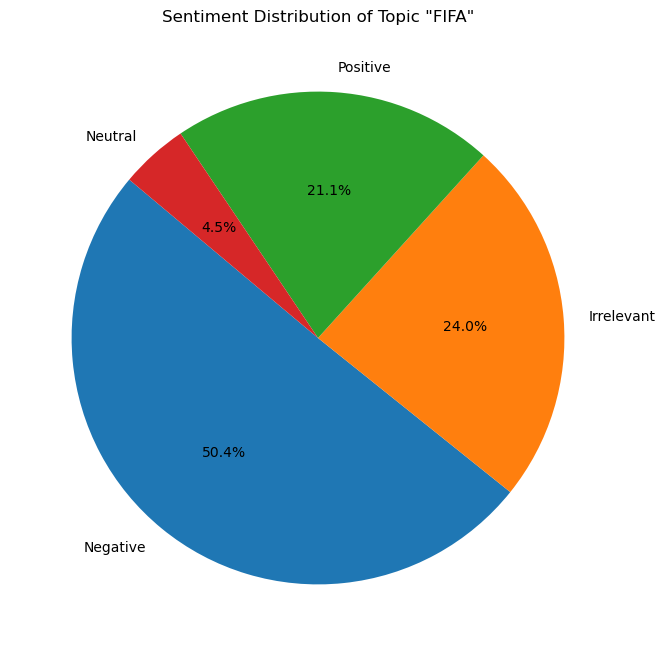

In [49]:
# Filter the dataset to include only entries related to the topic 'FIFA'
fifa_data = df[df['Game'] == 'FIFA']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = fifa_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "FIFA"')
plt.show()

In [50]:
df['msg_len'] = df['Text'].apply(len)

In [51]:
df.head()

,ID,Game,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57


# Plot of message length distribution in data

C:\Users\Anuj Singh Tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


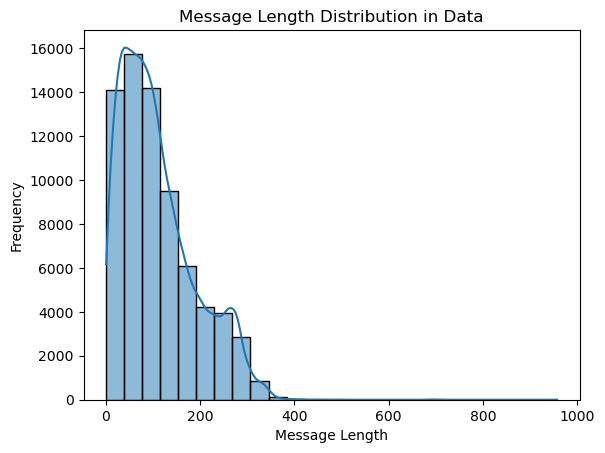

In [52]:
sns.histplot(df['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

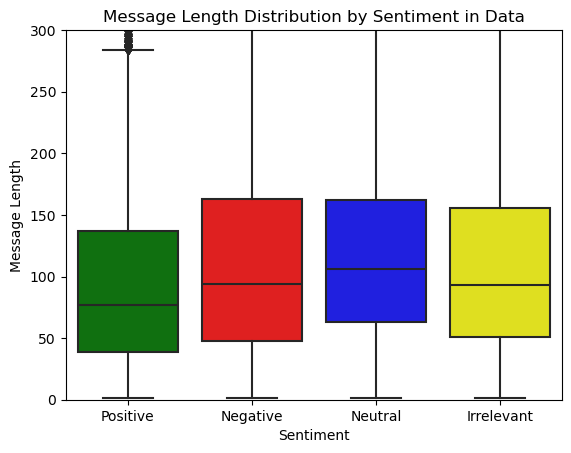

In [53]:
sns.boxplot(data=df, x=df['Sentiment'], y='msg_len', 
            palette=['green', 'red', 'blue', 'yellow'], 
            order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])

plt.title('Message Length Distribution by Sentiment in Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()

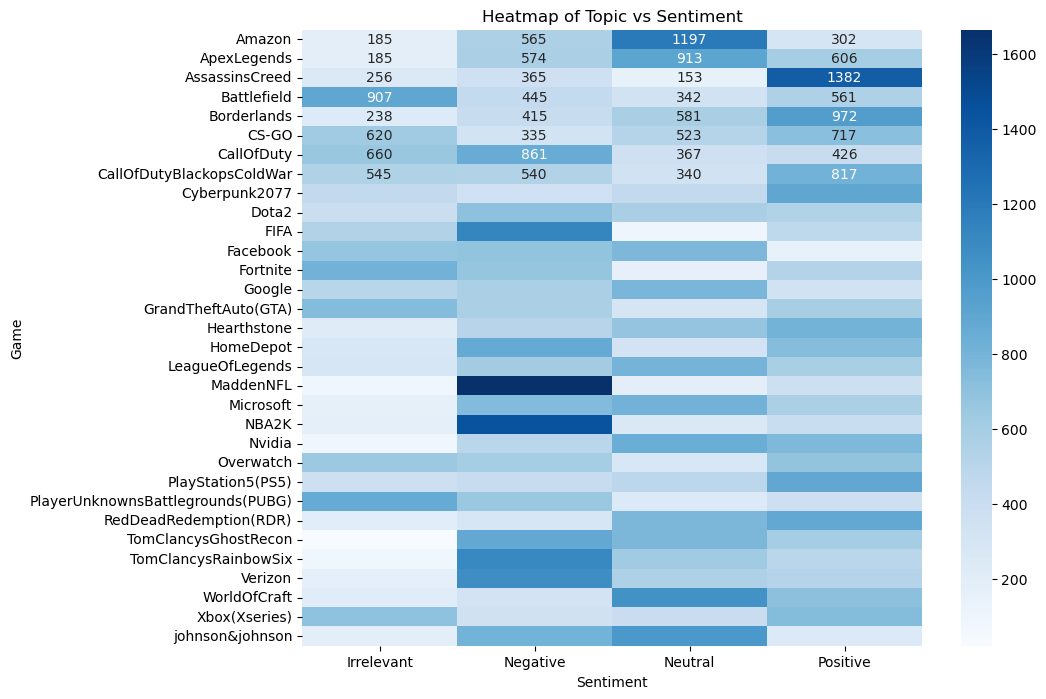

In [60]:
# Create a crosstab of the data
crosstab = pd.crosstab(df['Game'], df['Sentiment'])

# Create a heatmap of the crosstab
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Game')
plt.show()